In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.calibration import calibration_curve, CalibrationDisplay
from sklearn.metrics import roc_curve, auc
from matplotlib.gridspec import GridSpec
import matplotlib.ticker as ticker

In [4]:
def plot_roc_all_feat(X, y):

    fig = plt.figure(figsize=(12,10))
    
    feature_list = (['distanceFromNet'], ['angleFromNet'], ['distanceFromNet', 'angleFromNet']  )
    feature_color_list = ['red', 'blue', 'green']
    plot_label_list = ['Distance from Net', 'Angle from Net', 'Distance and Angle from Net']
    
    for i, feature in enumerate(feature_list):
        X_val, y_val, y_pred, accuracy,  pred_probs = Log_reg(X, y, feature)           
        print(f'Accuracy score is {accuracy}')
            
        plot_color = feature_color_list[i]
        plot_label = plot_label_list[i]
            
        probs_isgoal = pred_probs[:,1]
        fpr, tpr, _ = roc_curve(y_val,probs_isgoal)
        roc_auc = auc(fpr,tpr)
            
        plt.plot(fpr, tpr, color = plot_color, label = f'{plot_label} '+'AUC = %0.2f' % roc_auc, lw=2) 
        
    #Random Baseline
    baseline_is_goal = np.random.uniform(0,1,probs_isgoal.shape[0])
    plot_color = 'Magenta'
    plot_label = 'Random Baseline'
    fpr, tpr, _ = roc_curve(y_val,baseline_is_goal)
    roc_auc = auc(fpr,tpr)
    plt.plot(fpr, tpr, color = plot_color, label = f'{plot_label} '+'AUC = %0.2f' % roc_auc, lw=2)
            
    
    ax = plt.gca()
    ax.grid()
    ax.set_facecolor('0.95')
    
    plt.title('ROC Curves', fontsize=20)
    plt.legend(loc=2,prop={'size': 16})
    plt.rc('xtick', labelsize=16)
    plt.rc('ytick', labelsize=16)
    plt.ylabel('True Positive Rate', fontsize=20)
    plt.xlabel('False Positive Rate', fontsize=20)    
    plt.grid(True)
    plt.tight_layout()
    plt.savefig(f'2-3-3a_ROC_curves.png')
    plt.show()

Accuracy score is 0.9041387332782319
Accuracy score is 0.9041387332782319
Accuracy score is 0.9041387332782319


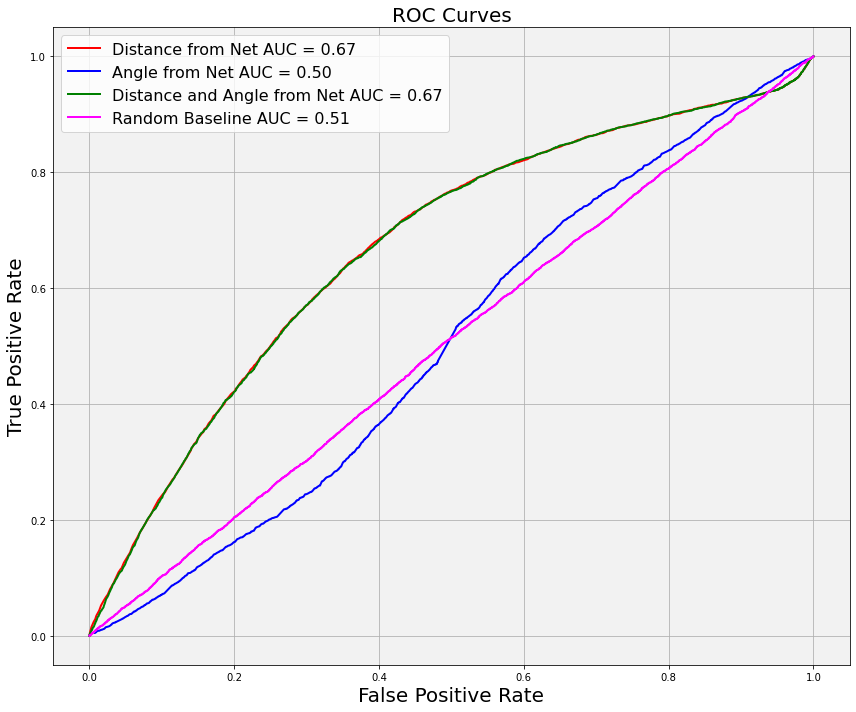

In [5]:
plot_roc_all_feat(X,y)

In [8]:
def plot_goal_rate_all_feat(X, y):

    fig = plt.figure(figsize=(12,10))
    
    feature_list = (['distanceFromNet'], ['angleFromNet'], ['distanceFromNet', 'angleFromNet']  )
    feature_color_list = ['red', 'blue', 'green']
    plot_label_list = ['Distance from Net', 'Angle from Net', 'Distance and Angle from Net']
    
    #if model_name == 'LR':
    for i, feature in enumerate(feature_list):
            
        X_val, y_val, y_pred, accuracy,  pred_probs = Log_reg(X, y, feature)   
        print(f'Accuracy score is {accuracy}')
            
        plot_color = feature_color_list[i]
        plot_label = plot_label_list[i]
            
        df_percentile =  calc_percentile(pred_probs, y_val)
        goal_rate_df = goal_rate(df_percentile)
        goal_rate_x = goal_rate_df['Percentile']
        goal_rate_y = goal_rate_df['Rate']
        plt.plot(goal_rate_x,goal_rate_y, color = plot_color, label = f'{plot_label}' )
                 
        
    #Random Baseline
    probs_isgoal = pred_probs[:,1]
    baseline_is_goal = np.random.uniform(0,1,probs_isgoal.shape[0])
    no_baseline_goal = np.array([(1-i) for i in baseline_is_goal])
    random_probs = np.column_stack((baseline_is_goal, no_baseline_goal))
    df_percentile =  calc_percentile(random_probs, y_val)
    goal_rate_df = goal_rate(df_percentile)
    goal_rate_x = goal_rate_df['Percentile']
    goal_rate_y = goal_rate_df['Rate']
        
    plot_color = 'Magenta'
    plot_label = 'Random Baseline'
    plt.plot(goal_rate_x,goal_rate_y, color = plot_color, label = f'{plot_label}' )

        
            
    ax = plt.gca()
    ax.grid()
    ax.set_facecolor('0.95')
    
    ax.set_ylim([0,100])
    ax.set_xlim([0,100])
    ax.invert_xaxis()
    major_ticks = np.arange(0, 110, 10)
    ax.set_xticks(major_ticks)
    ax.set_yticks(major_ticks)
    
    plt.rc('xtick', labelsize=16)
    plt.rc('ytick', labelsize=16)
    
    plt.grid(True)
    plt.title('Goal Rate', fontsize=20)
    plt.xlabel('Shot probability model percentile', fontsize=16)
    plt.ylabel('Goals / (Shots+Goals)%', fontsize=16)
    plt.legend(loc=2,prop={'size': 16})
    plt.tight_layout()
    plt.savefig(f'2-3-3b_goal_rates.png')
    plt.show()
            

Accuracy score is 0.9041387332782319
Accuracy score is 0.9041387332782319
Accuracy score is 0.9041387332782319


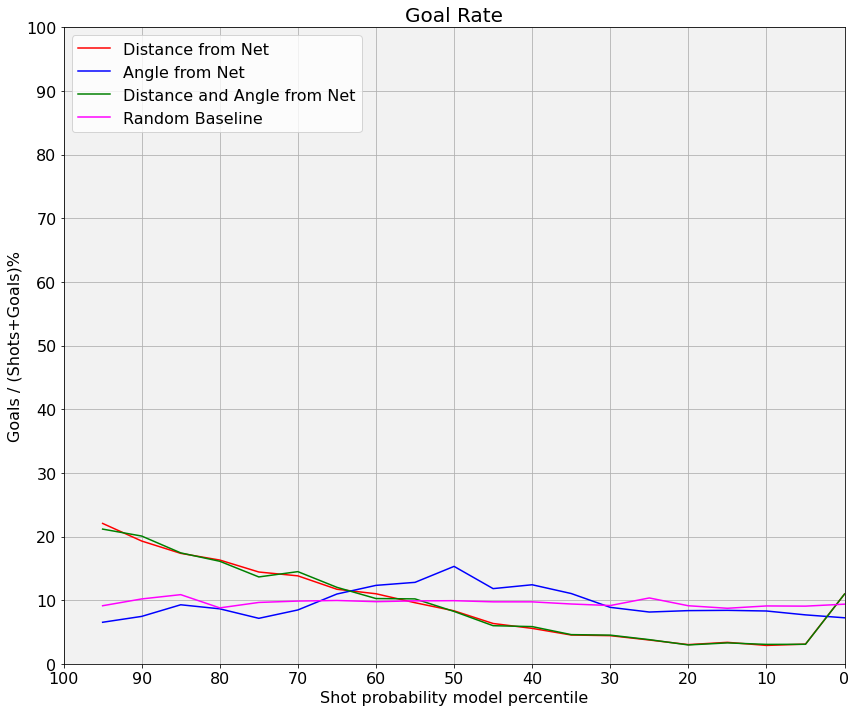

In [9]:
plot_goal_rate_all_feat(X,y)

In [10]:
def plot_cumulative_rate_all_feat(X, y):

    fig = plt.figure(figsize=(12,10))
    
    feature_list = (['distanceFromNet'], ['angleFromNet'], ['distanceFromNet', 'angleFromNet']  )
    feature_color_list = ['red', 'blue', 'green']
    plot_label_list = ['Distance from Net', 'Angle from Net', 'Distance and Angle from Net']
    
    #if model_name == 'LR':
    for i, feature in enumerate(feature_list):
            
        X_val, y_val, y_pred, accuracy,  pred_probs = Log_reg(X, y, feature)   
        print(f'Accuracy score is {accuracy}')
            
        plot_color = feature_color_list[i]
        plot_label = plot_label_list[i]
            
        df_percentile =  calc_percentile(pred_probs, y_val)
        df_precentile_only_goal = df_percentile[df_percentile['isGoal'] == 1]
        ax = sns.ecdfplot(data=df_precentile_only_goal, x=100 - df_precentile_only_goal.Percentile, 
                              color=plot_color)

                 
        
    #Random Baseline
    probs_isgoal = pred_probs[:,1]
    baseline_is_goal = np.random.uniform(0,1,probs_isgoal.shape[0])
    no_baseline_goal = np.array([(1-i) for i in baseline_is_goal])
    random_probs = np.column_stack((baseline_is_goal, no_baseline_goal))
    df_percentile =  calc_percentile(random_probs, y_val)
    df_precentile_only_goal = df_percentile[df_percentile['isGoal'] == 1]
        
    plot_color = 'Magenta'
    plot_label = 'Random Baseline'
    ax = sns.ecdfplot(data=df_precentile_only_goal, x=100 - df_precentile_only_goal.Percentile, 
                              color=plot_color)
 
            
    ax = plt.gca()
    ax.grid()
    ax.set_facecolor('0.95')
    plt.yticks(np.arange(0, 1.05, 0.1))
    plt.xticks(np.arange(0, 100 * 1.01, 10))
    xvals = ax.get_xticks()
    ax.set_xticklabels(100 - xvals.astype(np.int32), fontsize=16)
    yvals = ax.get_yticks()
    ax.set_yticklabels(['{:,.0%}'.format(y) for y in yvals], fontsize=16)
    ax.set_xlabel('Shot probability model percentile', fontsize=16)
    ax.set_ylabel('Proportion', fontsize=16)
    ax.set_title(f"Cumulative % of Goals", fontsize=20)
    plt.grid(color='gray', linestyle='--', linewidth=0.5)
    
    plot_label_list.append('Random Baseline')
    plt.legend(labels=plot_label_list, fontsize=16)
    plt.tight_layout()
    plt.savefig(f'2-3-3c_goal_proportions.png')
    plt.show()

Accuracy score is 0.9041387332782319
Accuracy score is 0.9041387332782319
Accuracy score is 0.9041387332782319


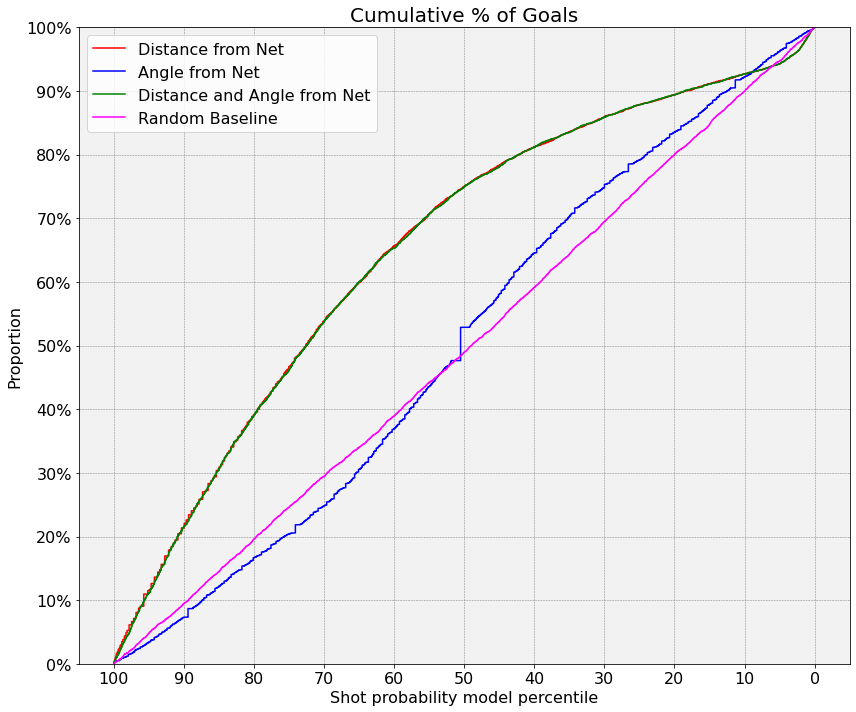

In [11]:
plot_cumulative_rate_all_feat(X, y)

In [12]:
def plot_calibration_all_feat(X, y):

    fig = plt.figure(figsize=(20, 20))
    gs = GridSpec(4, 3)

    ax_calibration_curve = fig.add_subplot(gs[:2, :2])
    
    feature_list = [['distanceFromNet'], ['angleFromNet'], ['distanceFromNet', 'angleFromNet']  ]
    feature_color_list = ['red', 'blue', 'green']
    plot_label_list = ['Distance from Net', 'Angle from Net', 'Distance and Angle from Net']
    
    feature_list.append('RandomBaseline')
    
    #if model_name == 'LR':
    for i, feature in enumerate(feature_list):
            
        if feature != 'RandomBaseline':
            
            X_val, y_val, y_pred, accuracy,  pred_probs = Log_reg(X, y, feature)   
            print(f'Accuracy score is {accuracy}')
                
            y_val_is_goal = y_val['isGoal']
            pred_probs_is_goal = pred_probs[:,1] 
            
            plot_color = feature_color_list[i]
            plot_label = plot_label_list[i]
            
        else:
            random_goal_prob = np.random.uniform(0, 1, len(y_val))
            
            y_val_is_goal = y_val['isGoal']
            pred_probs_is_goal = random_goal_prob.copy()
            
            plot_color = 'magenta'
            plot_label = 'Random Baseline'
            
           
        ax_display = CalibrationDisplay.from_predictions(y_val_is_goal,pred_probs_is_goal, n_bins=50, 
                                                             ax=ax_calibration_curve, color=plot_color, label=plot_label)
   

    ax = plt.gca()
    ax.set_facecolor('0.95')
    ax_calibration_curve.grid()
    
    plt.title("Calibration plots", fontsize=20)
    plt.legend(loc=2,prop={'size': 16})
    plt.rc('xtick', labelsize=16)
    plt.rc('ytick', labelsize=16)
    ax.xaxis.set_major_locator(ticker.MultipleLocator(0.1))
    ax.yaxis.set_major_locator(ticker.MultipleLocator(0.1))
    plt.ylabel('Fraction of positives', fontsize=20)
    plt.xlabel('Mean predicted probability', fontsize=20)
    plt.tight_layout()
    plt.savefig(f'2-3-3d_calibration_plots.png')
    plt.show()

Accuracy score is 0.9041387332782319
Accuracy score is 0.9041387332782319
Accuracy score is 0.9041387332782319


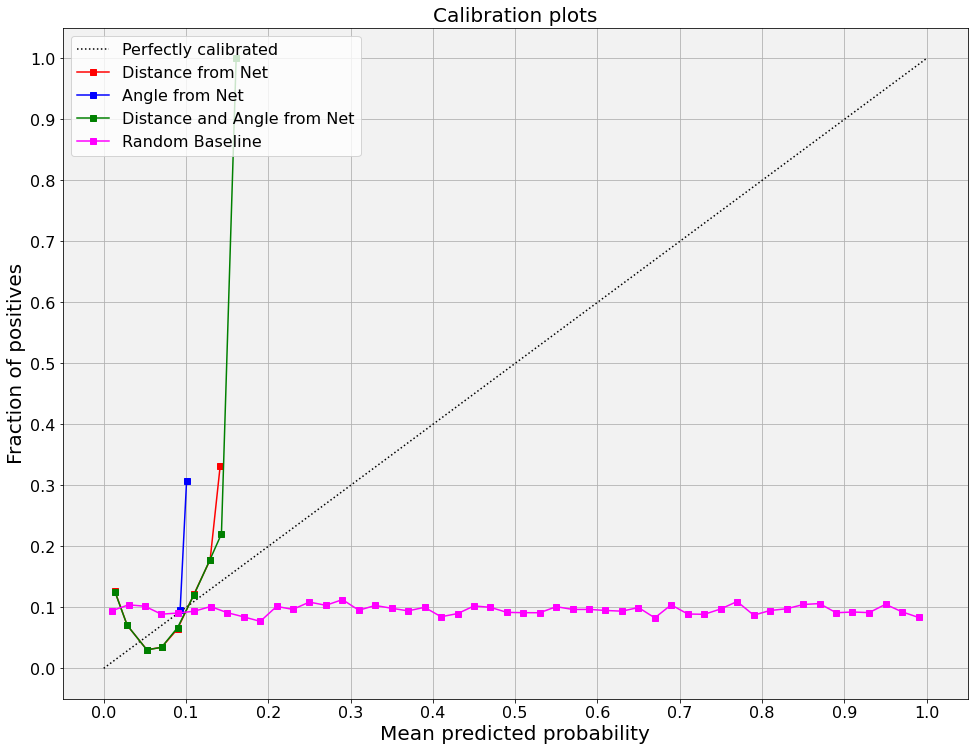

In [13]:
plot_calibration_all_feat(X, y)